# Payday Loan Vendor Capture

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import requests
import os
from pprint import pprint


In [5]:
# Load the csv containing the CA zip codes and counties only into a dataframe
counties_zips_only_df = pd.read_csv("resources/CACountiesZipsonly.csv", encoding="utf-8")
counties_zips_only_df

,Zip Code,City,County
0,90001,Los Angeles,Los Angeles
1,90002,Los Angeles,Los Angeles
2,90003,Los Angeles,Los Angeles
3,90004,Los Angeles,Los Angeles
4,90005,Los Angeles,Los Angeles
...,...,...,...
1546,96136,Wendel,Lassen
1547,96137,Westwood,Lassen
1548,96146,Olympic Valley,Placer
1549,96150,South Lake Tahoe,El Dorado


In [6]:
# Load the csv containing the CA Payday Vendor info into a dataframe
payday_vendors_df = pd.read_csv("resources/Combined_Clean_PaydayLenderLocations.csv", encoding="utf-8")
payday_vendors_df

,Zip Code,Payday Vendor,Address,Lat,Lng
0,90001,ACE Cash Express,"1232 E Florence Ave, Los Angeles, CA 90001, Un...",33.974583,-118.252963
1,90001,Easy Financial,"6003 Compton Ave, Los Angeles, CA 90001, Unite...",33.985552,-118.248060
2,90002,ACE Cash Express,"10005 S Central Ave, Los Angeles, CA 90002, Un...",33.945482,-118.254526
3,90002,Continental Currency Services,"1669 E 103rd St, Los Angeles, CA 90002, United...",33.943856,-118.244298
4,90002,The Check Cashing Place,"2284 E Firestone Blvd, Los Angeles, CA 90002, ...",33.957857,-118.231333
...,...,...,...,...,...
2521,96150,Western Highland Mortgage,"3170 US-50, South Lake Tahoe, CA 96150, United...",38.852693,-120.020465
2522,96150,MoneyGram,"3471 Lake Tahoe Blvd, South Lake Tahoe, CA 961...",38.946675,-119.964723
2523,96161,Sierra Mountain Mortgage Inc,"10098 Jibboom St # 201, Truckee, CA 96161, Uni...",39.328434,-120.186173
2524,96161,"Happy Investments, Inc. Truckee Ca","11260 Donner Pass Road C1 # 1014-G, Truckee, C...",39.327165,-120.205797


In [7]:
# Merge the CA Payday Vendors with the Zip and County info to gain the city and county info
payday_vendors_withzipandcounty_df = pd.merge(payday_vendors_df, counties_zips_only_df, on='Zip Code', how='left')
payday_vendors_withzipandcounty_df

,Zip Code,Payday Vendor,Address,Lat,Lng,City,County
0,90001,ACE Cash Express,"1232 E Florence Ave, Los Angeles, CA 90001, Un...",33.974583,-118.252963,Los Angeles,Los Angeles
1,90001,Easy Financial,"6003 Compton Ave, Los Angeles, CA 90001, Unite...",33.985552,-118.248060,Los Angeles,Los Angeles
2,90002,ACE Cash Express,"10005 S Central Ave, Los Angeles, CA 90002, Un...",33.945482,-118.254526,Los Angeles,Los Angeles
3,90002,Continental Currency Services,"1669 E 103rd St, Los Angeles, CA 90002, United...",33.943856,-118.244298,Los Angeles,Los Angeles
4,90002,The Check Cashing Place,"2284 E Firestone Blvd, Los Angeles, CA 90002, ...",33.957857,-118.231333,Los Angeles,Los Angeles
...,...,...,...,...,...,...,...
2521,96150,Western Highland Mortgage,"3170 US-50, South Lake Tahoe, CA 96150, United...",38.852693,-120.020465,South Lake Tahoe,El Dorado
2522,96150,MoneyGram,"3471 Lake Tahoe Blvd, South Lake Tahoe, CA 961...",38.946675,-119.964723,South Lake Tahoe,El Dorado
2523,96161,Sierra Mountain Mortgage Inc,"10098 Jibboom St # 201, Truckee, CA 96161, Uni...",39.328434,-120.186173,Truckee,Nevada
2524,96161,"Happy Investments, Inc. Truckee Ca","11260 Donner Pass Road C1 # 1014-G, Truckee, C...",39.327165,-120.205797,Truckee,Nevada


In [8]:
# Count the Vendors per zip code
vendor_counts = payday_vendors_withzipandcounty_df['Zip Code'].value_counts()

In [9]:
# Write the count to a dataframe and reset the index
vendor_counts_df = pd.DataFrame(vendor_counts).reset_index()

In [10]:
# Rename the columns to the correct values
vendor_counts_rename_df = vendor_counts_df.rename(columns={'index':'Zipcode', 'Zip Code':'Number of Payday Vendors'})
vendor_counts_rename_df

,Zipcode,Number of Payday Vendors
0,92553,15
1,93309,14
2,93306,13
3,93065,13
4,92395,13
...,...,...
748,90241,1
749,90245,1
750,92314,1
751,90275,1


In [11]:
# Load the csv containing the CA zip codes and counties data into a dataframe
counties_zips_data_df = pd.read_csv("resources/CACountiesZips.csv", encoding="utf-8")
counties_zips_data_df

,Population,Poverty Count,poverty_male,poverty_female,poverty_white_alone,poverty_black_alone,population_american_indian_alone,poverty_asian_alone,poverty_native_hawaiian_alone,poverty_two_or_more_races,...,employment_labor_force,employment_not_labor_force,employment_employed,employment_unemployed,Zipcode,Poverty Rate,index,City,County,Type
0,54760.0,17496.0,7700.0,9796.0,10023.0,1444.0,37.0,10.0,0.0,196.0,...,23755.0,14832.0,20844.0,2911.0,90001,31.950329,1,Los Angeles,Los Angeles,Standard
1,49475.0,17116.0,7753.0,9363.0,8262.0,5242.0,76.0,22.0,2.0,216.0,...,18883.0,15064.0,16323.0,2560.0,90002,34.595250,2,Los Angeles,Los Angeles,Standard
2,66200.0,25832.0,11625.0,14207.0,5648.0,7478.0,185.0,28.0,19.0,365.0,...,26638.0,18813.0,22346.0,4263.0,90003,39.021148,3,Los Angeles,Los Angeles,Standard
3,62760.0,15350.0,7134.0,8216.0,5002.0,790.0,27.0,2494.0,10.0,148.0,...,37615.0,14039.0,32207.0,5395.0,90004,24.458254,4,Los Angeles,Los Angeles,Standard
4,39548.0,10496.0,4904.0,5592.0,2296.0,392.0,77.0,2516.0,7.0,185.0,...,23323.0,8652.0,20520.0,2803.0,90005,26.539901,5,Los Angeles,Los Angeles,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,110.0,0.0,110.0,0.0,96136,0.000000,2567,Wendel,Lassen,Standard
1547,3826.0,569.0,285.0,284.0,473.0,0.0,70.0,0.0,0.0,26.0,...,1602.0,1690.0,1270.0,325.0,96137,14.871929,2568,Westwood,Lassen,Standard
1548,853.0,88.0,40.0,48.0,64.0,0.0,0.0,0.0,0.0,0.0,...,660.0,154.0,598.0,62.0,96146,10.316530,2574,Olympic Valley,Placer,Standard
1549,28686.0,4443.0,2236.0,2207.0,3037.0,86.0,47.0,78.0,0.0,273.0,...,16574.0,7138.0,14377.0,2161.0,96150,15.488392,2576,South Lake Tahoe,El Dorado,Standard


In [12]:
# Merge the vendor counts into the county and zipcode data
counties_zips_datapdvendors_df = pd.merge(counties_zips_data_df, vendor_counts_rename_df, on='Zipcode', how='outer')
counties_zips_datapdvendors_df

,Population,Poverty Count,poverty_male,poverty_female,poverty_white_alone,poverty_black_alone,population_american_indian_alone,poverty_asian_alone,poverty_native_hawaiian_alone,poverty_two_or_more_races,...,employment_not_labor_force,employment_employed,employment_unemployed,Zipcode,Poverty Rate,index,City,County,Type,Number of Payday Vendors
0,54760.0,17496.0,7700.0,9796.0,10023.0,1444.0,37.0,10.0,0.0,196.0,...,14832.0,20844.0,2911.0,90001,31.950329,1,Los Angeles,Los Angeles,Standard,2.0
1,49475.0,17116.0,7753.0,9363.0,8262.0,5242.0,76.0,22.0,2.0,216.0,...,15064.0,16323.0,2560.0,90002,34.595250,2,Los Angeles,Los Angeles,Standard,3.0
2,66200.0,25832.0,11625.0,14207.0,5648.0,7478.0,185.0,28.0,19.0,365.0,...,18813.0,22346.0,4263.0,90003,39.021148,3,Los Angeles,Los Angeles,Standard,8.0
3,62760.0,15350.0,7134.0,8216.0,5002.0,790.0,27.0,2494.0,10.0,148.0,...,14039.0,32207.0,5395.0,90004,24.458254,4,Los Angeles,Los Angeles,Standard,2.0
4,39548.0,10496.0,4904.0,5592.0,2296.0,392.0,77.0,2516.0,7.0,185.0,...,8652.0,20520.0,2803.0,90005,26.539901,5,Los Angeles,Los Angeles,Standard,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,110.0,0.0,96136,0.000000,2567,Wendel,Lassen,Standard,NaN
1547,3826.0,569.0,285.0,284.0,473.0,0.0,70.0,0.0,0.0,26.0,...,1690.0,1270.0,325.0,96137,14.871929,2568,Westwood,Lassen,Standard,NaN
1548,853.0,88.0,40.0,48.0,64.0,0.0,0.0,0.0,0.0,0.0,...,154.0,598.0,62.0,96146,10.316530,2574,Olympic Valley,Placer,Standard,1.0
1549,28686.0,4443.0,2236.0,2207.0,3037.0,86.0,47.0,78.0,0.0,273.0,...,7138.0,14377.0,2161.0,96150,15.488392,2576,South Lake Tahoe,El Dorado,Standard,6.0


In [13]:
# Fill NaN values with 0
counties_zips_datapdvendors_df['Number of Payday Vendors'].fillna(value=0, inplace=True)
counties_zips_datapdvendors_df['Poverty Rate'].fillna(value=0, inplace=True)
counties_zips_datapdvendors_df

,Population,Poverty Count,poverty_male,poverty_female,poverty_white_alone,poverty_black_alone,population_american_indian_alone,poverty_asian_alone,poverty_native_hawaiian_alone,poverty_two_or_more_races,...,employment_not_labor_force,employment_employed,employment_unemployed,Zipcode,Poverty Rate,index,City,County,Type,Number of Payday Vendors
0,54760.0,17496.0,7700.0,9796.0,10023.0,1444.0,37.0,10.0,0.0,196.0,...,14832.0,20844.0,2911.0,90001,31.950329,1,Los Angeles,Los Angeles,Standard,2.0
1,49475.0,17116.0,7753.0,9363.0,8262.0,5242.0,76.0,22.0,2.0,216.0,...,15064.0,16323.0,2560.0,90002,34.595250,2,Los Angeles,Los Angeles,Standard,3.0
2,66200.0,25832.0,11625.0,14207.0,5648.0,7478.0,185.0,28.0,19.0,365.0,...,18813.0,22346.0,4263.0,90003,39.021148,3,Los Angeles,Los Angeles,Standard,8.0
3,62760.0,15350.0,7134.0,8216.0,5002.0,790.0,27.0,2494.0,10.0,148.0,...,14039.0,32207.0,5395.0,90004,24.458254,4,Los Angeles,Los Angeles,Standard,2.0
4,39548.0,10496.0,4904.0,5592.0,2296.0,392.0,77.0,2516.0,7.0,185.0,...,8652.0,20520.0,2803.0,90005,26.539901,5,Los Angeles,Los Angeles,Standard,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,110.0,0.0,96136,0.000000,2567,Wendel,Lassen,Standard,0.0
1547,3826.0,569.0,285.0,284.0,473.0,0.0,70.0,0.0,0.0,26.0,...,1690.0,1270.0,325.0,96137,14.871929,2568,Westwood,Lassen,Standard,0.0
1548,853.0,88.0,40.0,48.0,64.0,0.0,0.0,0.0,0.0,0.0,...,154.0,598.0,62.0,96146,10.316530,2574,Olympic Valley,Placer,Standard,1.0
1549,28686.0,4443.0,2236.0,2207.0,3037.0,86.0,47.0,78.0,0.0,273.0,...,7138.0,14377.0,2161.0,96150,15.488392,2576,South Lake Tahoe,El Dorado,Standard,6.0


In [14]:
# Calculate the poverty rates for race and fill NaN values with 
poverty_rate_black = counties_zips_datapdvendors_df['poverty_black_alone'] / counties_zips_datapdvendors_df['Population'] * 100
poverty_rate_white = counties_zips_datapdvendors_df['poverty_white_alone'] / counties_zips_datapdvendors_df['Population'] * 100
poverty_rate_hisp = counties_zips_datapdvendors_df['poverty_hispanic_origin'] / counties_zips_datapdvendors_df['Population'] * 100
poverty_rate_asian = counties_zips_datapdvendors_df['poverty_asian_alone'] / counties_zips_datapdvendors_df['Population'] * 100
race_poverty_rate_df = pd.DataFrame({'Poverty Rate (African American)': poverty_rate_black, 
                                     'Poverty Rate (White)': poverty_rate_white, 
                                     'Poverty Rate (Hispanic)': poverty_rate_hisp, 
                                     'Poverty Rate (Asian)': poverty_rate_asian
                                    })
race_poverty_rate_df.fillna(value=0, inplace=True)
race_poverty_rate_df

,Poverty Rate (African American),Poverty Rate (White),Poverty Rate (Hispanic),Poverty Rate (Asian)
0,2.636961,18.303506,29.026662,0.018262
1,10.595250,16.699343,23.009601,0.044467
2,11.296073,8.531722,27.111782,0.042296
3,1.258764,7.970045,16.359146,3.973869
4,0.991201,5.805603,17.796096,6.361889
...,...,...,...,...
1546,0.000000,0.000000,0.000000,0.000000
1547,0.000000,12.362781,0.731835,0.000000
1548,0.000000,7.502931,2.813599,0.000000
1549,0.299798,10.587046,6.895350,0.271910


In [15]:
# Merge the poverty rates by race in the main dataframe
counties_zips_datapdvendorsrates_df = counties_zips_datapdvendors_df.join(race_poverty_rate_df)
counties_zips_datapdvendorsrates_df

,Population,Poverty Count,poverty_male,poverty_female,poverty_white_alone,poverty_black_alone,population_american_indian_alone,poverty_asian_alone,poverty_native_hawaiian_alone,poverty_two_or_more_races,...,Poverty Rate,index,City,County,Type,Number of Payday Vendors,Poverty Rate (African American),Poverty Rate (White),Poverty Rate (Hispanic),Poverty Rate (Asian)
0,54760.0,17496.0,7700.0,9796.0,10023.0,1444.0,37.0,10.0,0.0,196.0,...,31.950329,1,Los Angeles,Los Angeles,Standard,2.0,2.636961,18.303506,29.026662,0.018262
1,49475.0,17116.0,7753.0,9363.0,8262.0,5242.0,76.0,22.0,2.0,216.0,...,34.595250,2,Los Angeles,Los Angeles,Standard,3.0,10.595250,16.699343,23.009601,0.044467
2,66200.0,25832.0,11625.0,14207.0,5648.0,7478.0,185.0,28.0,19.0,365.0,...,39.021148,3,Los Angeles,Los Angeles,Standard,8.0,11.296073,8.531722,27.111782,0.042296
3,62760.0,15350.0,7134.0,8216.0,5002.0,790.0,27.0,2494.0,10.0,148.0,...,24.458254,4,Los Angeles,Los Angeles,Standard,2.0,1.258764,7.970045,16.359146,3.973869
4,39548.0,10496.0,4904.0,5592.0,2296.0,392.0,77.0,2516.0,7.0,185.0,...,26.539901,5,Los Angeles,Los Angeles,Standard,0.0,0.991201,5.805603,17.796096,6.361889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2567,Wendel,Lassen,Standard,0.0,0.000000,0.000000,0.000000,0.000000
1547,3826.0,569.0,285.0,284.0,473.0,0.0,70.0,0.0,0.0,26.0,...,14.871929,2568,Westwood,Lassen,Standard,0.0,0.000000,12.362781,0.731835,0.000000
1548,853.0,88.0,40.0,48.0,64.0,0.0,0.0,0.0,0.0,0.0,...,10.316530,2574,Olympic Valley,Placer,Standard,1.0,0.000000,7.502931,2.813599,0.000000
1549,28686.0,4443.0,2236.0,2207.0,3037.0,86.0,47.0,78.0,0.0,273.0,...,15.488392,2576,South Lake Tahoe,El Dorado,Standard,6.0,0.299798,10.587046,6.895350,0.271910


r-value or the correlation coefficient = 0.1524339311059148


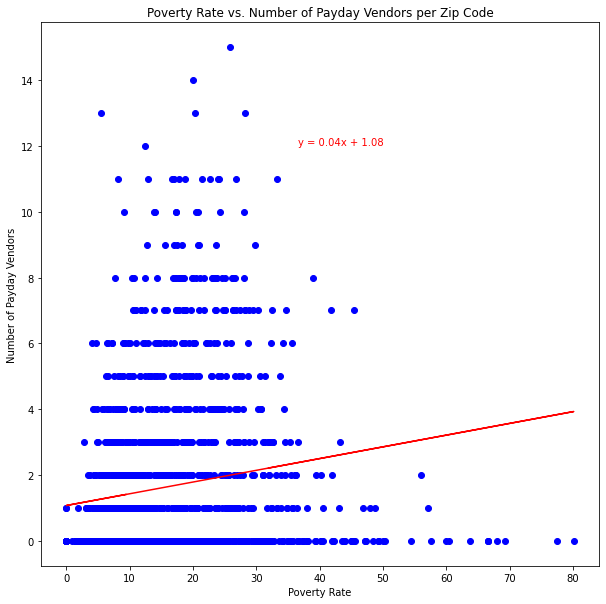

In [16]:
# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(counties_zips_datapdvendorsrates_df['Poverty Rate'], counties_zips_datapdvendorsrates_df['Number of Payday Vendors'])
regression_values = counties_zips_datapdvendorsrates_df['Poverty Rate'] * slope + intercept

# Make a variable for the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print the r-value
print(f'r-value or the correlation coefficient = {rvalue}');

# Plot the data and linear regression
fig, ax = plt.subplots(figsize=(10, 10));
ax.scatter(counties_zips_datapdvendorsrates_df['Poverty Rate'],counties_zips_datapdvendorsrates_df['Number of Payday Vendors'], marker='o', color='b');
ax.plot(counties_zips_datapdvendorsrates_df['Poverty Rate'], regression_values, "r-");
ax.set(xlabel='Poverty Rate', ylabel='Number of Payday Vendors', title='Poverty Rate vs. Number of Payday Vendors per Zip Code');
ax.annotate(line_eq, xy=(50, 12), xycoords='data',xytext=(0.8, 0.95), textcoords='offset points', horizontalalignment='right', color="red");
plt.savefig("images/PRvsVen.png")

r-value or the correlation coefficient = 0.6209661060908946


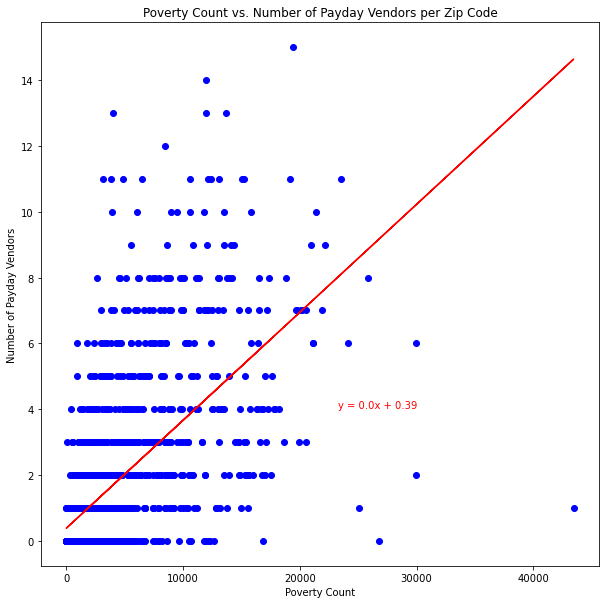

In [17]:
# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(counties_zips_datapdvendorsrates_df['Poverty Count'], counties_zips_datapdvendorsrates_df['Number of Payday Vendors'])
regression_values = counties_zips_datapdvendorsrates_df['Poverty Count'] * slope + intercept

# Make a variable for the line equation
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print the r-value
print(f'r-value or the correlation coefficient = {rvalue}');

# Plot the data and linear regression
fig2, ax2 = plt.subplots(figsize=(10, 10));
ax2.scatter(counties_zips_datapdvendorsrates_df['Poverty Count'],counties_zips_datapdvendorsrates_df['Number of Payday Vendors'], marker='o', color='b');
ax2.plot(counties_zips_datapdvendorsrates_df['Poverty Count'], regression_values, "r-");
ax2.set(xlabel='Poverty Count', ylabel='Number of Payday Vendors', title='Poverty Count vs. Number of Payday Vendors per Zip Code');
ax2.annotate(line_eq2, xy=(30000, 4), xycoords='data',xytext=(0.8, 0.95), textcoords='offset points', horizontalalignment='right', color="red");
plt.savefig("images/PCvsVen.png")

r-value or the correlation coefficient = 0.35642516695504534


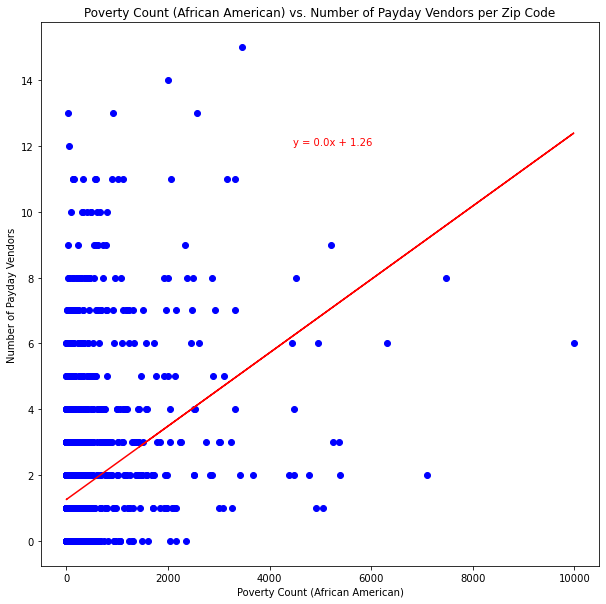

In [18]:
# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(counties_zips_datapdvendorsrates_df['poverty_black_alone'], counties_zips_datapdvendorsrates_df['Number of Payday Vendors'])
regression_values = counties_zips_datapdvendorsrates_df['poverty_black_alone'] * slope + intercept

# Make a variable for the line equation
line_eq3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print the r-value
print(f'r-value or the correlation coefficient = {rvalue}');

# Plot the data and linear regression
fig3, ax3 = plt.subplots(figsize=(10, 10));
ax3.scatter(counties_zips_datapdvendorsrates_df['poverty_black_alone'],counties_zips_datapdvendorsrates_df['Number of Payday Vendors'], marker='o', color='b');
ax3.plot(counties_zips_datapdvendorsrates_df['poverty_black_alone'], regression_values, "r-");
ax3.set(xlabel='Poverty Count (African American)', ylabel='Number of Payday Vendors', title='Poverty Count (African American) vs. Number of Payday Vendors per Zip Code');
ax3.annotate(line_eq3, xy=(6000, 12), xycoords='data',xytext=(0.8, 0.95), textcoords='offset points', horizontalalignment='right', color="red");
plt.savefig("images/PCBlackvsVen.png")

r-value or the correlation coefficient = 0.5413786416171631


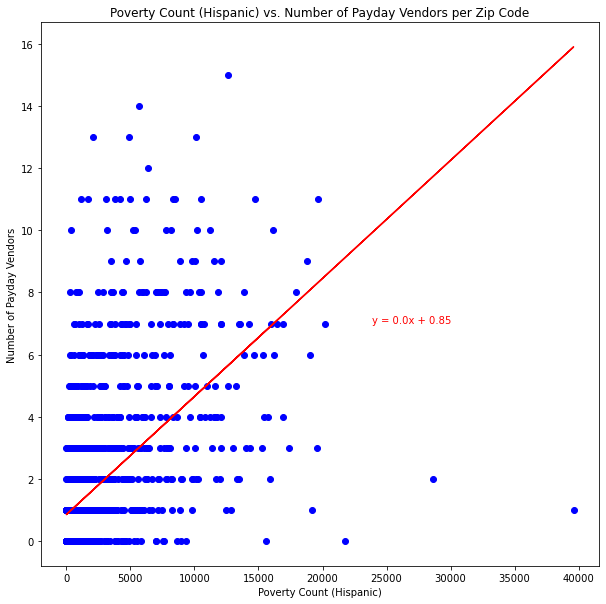

In [19]:
# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(counties_zips_datapdvendorsrates_df['poverty_hispanic_origin'], counties_zips_datapdvendorsrates_df['Number of Payday Vendors'])
regression_values = counties_zips_datapdvendorsrates_df['poverty_hispanic_origin'] * slope + intercept

# Make a variable for the line equation
line_eq4 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print the r-value
print(f'r-value or the correlation coefficient = {rvalue}');

# Plot the data and linear regression
fig4, ax4 = plt.subplots(figsize=(10, 10));
ax4.scatter(counties_zips_datapdvendorsrates_df['poverty_hispanic_origin'],counties_zips_datapdvendorsrates_df['Number of Payday Vendors'], marker='o', color='b');
ax4.plot(counties_zips_datapdvendorsrates_df['poverty_hispanic_origin'], regression_values, "r-");
ax4.set(xlabel='Poverty Count (Hispanic)', ylabel='Number of Payday Vendors', title='Poverty Count (Hispanic) vs. Number of Payday Vendors per Zip Code');
ax4.annotate(line_eq4, xy=(30000, 7), xycoords='data',xytext=(0.8, 0.95), textcoords='offset points', horizontalalignment='right', color="red");
plt.savefig("images/PCHispvsVen.png")

r-value or the correlation coefficient = 0.6505843404347365


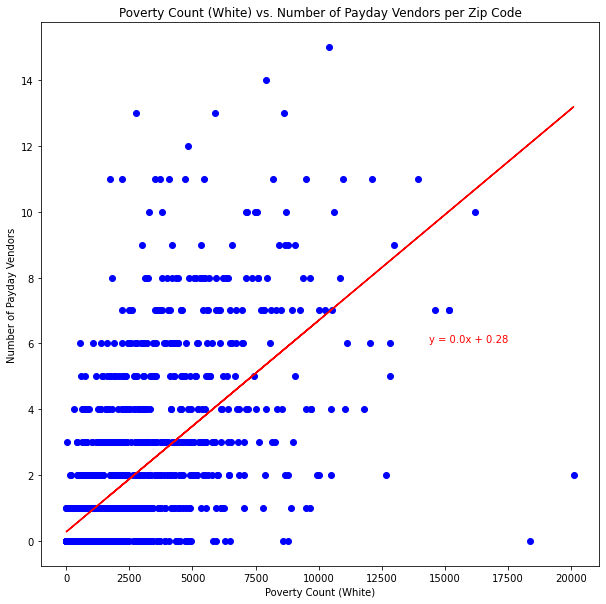

In [20]:
# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(counties_zips_datapdvendorsrates_df['poverty_white_alone'], counties_zips_datapdvendorsrates_df['Number of Payday Vendors'])
regression_values = counties_zips_datapdvendorsrates_df['poverty_white_alone'] * slope + intercept

# Make a variable for the line equation
line_eq5 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print the r-value
print(f'r-value or the correlation coefficient = {rvalue}');

# Plot the data and linear regression
fig5, ax5 = plt.subplots(figsize=(10, 10));
ax5.scatter(counties_zips_datapdvendorsrates_df['poverty_white_alone'],counties_zips_datapdvendorsrates_df['Number of Payday Vendors'], marker='o', color='b');
ax5.plot(counties_zips_datapdvendorsrates_df['poverty_white_alone'], regression_values, "r-");
ax5.set(xlabel='Poverty Count (White)', ylabel='Number of Payday Vendors', title='Poverty Count (White) vs. Number of Payday Vendors per Zip Code');
ax5.annotate(line_eq5, xy=(17500, 6), xycoords='data',xytext=(0.8, 0.95), textcoords='offset points', horizontalalignment='right', color="red");
plt.savefig("images/PCWhitevsVen.png")

r-value or the correlation coefficient = 0.2511347691057071


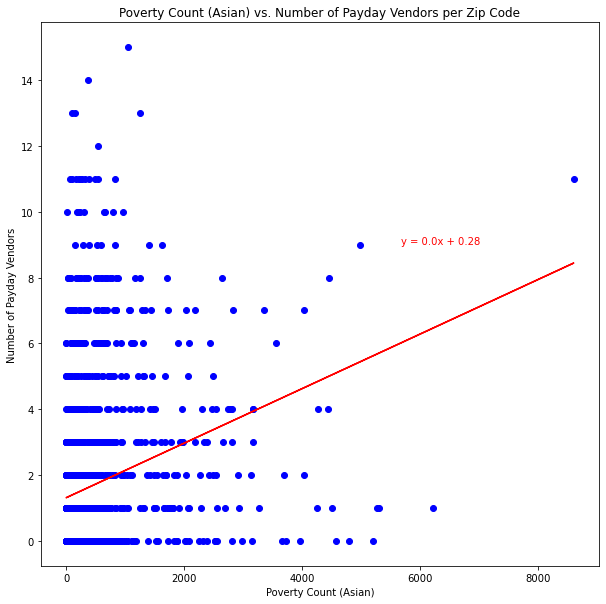

In [21]:
# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(counties_zips_datapdvendorsrates_df['poverty_asian_alone'], counties_zips_datapdvendorsrates_df['Number of Payday Vendors'])
regression_values = counties_zips_datapdvendorsrates_df['poverty_asian_alone'] * slope + intercept

# Make a variable for the line equation
line_eq6 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print the r-value
print(f'r-value or the correlation coefficient = {rvalue}');

# Plot the data and linear regression
fig6, ax6 = plt.subplots(figsize=(10, 10));
ax6.scatter(counties_zips_datapdvendorsrates_df['poverty_asian_alone'],counties_zips_datapdvendorsrates_df['Number of Payday Vendors'], marker='o', color='b');
ax6.plot(counties_zips_datapdvendorsrates_df['poverty_asian_alone'], regression_values, "r-");
ax6.set(xlabel='Poverty Count (Asian)', ylabel='Number of Payday Vendors', title='Poverty Count (Asian) vs. Number of Payday Vendors per Zip Code');
ax6.annotate(line_eq5, xy=(7000, 9), xycoords='data',xytext=(0.8, 0.95), textcoords='offset points', horizontalalignment='right', color="red");
plt.savefig("images/PCAsianvsVen.png")

r-value or the correlation coefficient = 0.6389121702396012


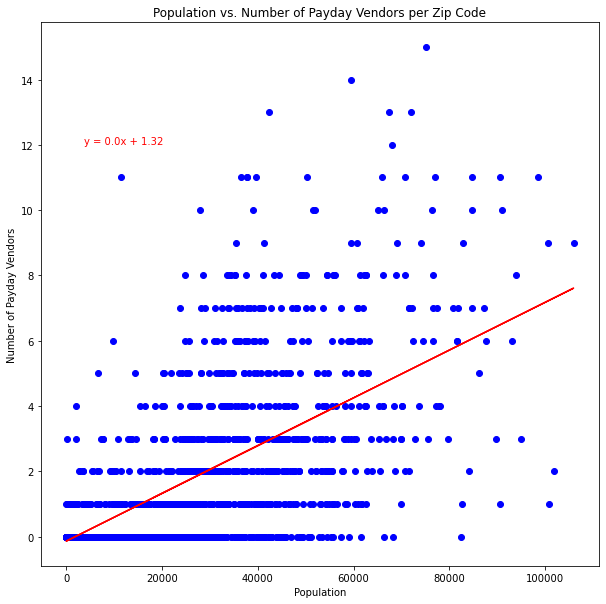

In [24]:
# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(counties_zips_datapdvendorsrates_df['Population'], counties_zips_datapdvendorsrates_df['Number of Payday Vendors'])
regression_values = counties_zips_datapdvendorsrates_df['Population'] * slope + intercept

# Make a variable for the line equation
line_eq7 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print the r-value
print(f'r-value or the correlation coefficient = {rvalue}');

# Plot the data and linear regression
fig7, ax7 = plt.subplots(figsize=(10, 10));
ax7.scatter(counties_zips_datapdvendorsrates_df['Population'],counties_zips_datapdvendorsrates_df['Number of Payday Vendors'], marker='o', color='b');
ax7.plot(counties_zips_datapdvendorsrates_df['Population'], regression_values, "r-");
ax7.set(xlabel='Population', ylabel='Number of Payday Vendors', title='Population vs. Number of Payday Vendors per Zip Code');
ax7.annotate(line_eq6, xy=(20000, 12), xycoords='data',xytext=(0.8, 0.95), textcoords='offset points', horizontalalignment='right', color="red");
plt.savefig("images/PopvsVen.png")

r-value or the correlation coefficient = 0.8062639210300554


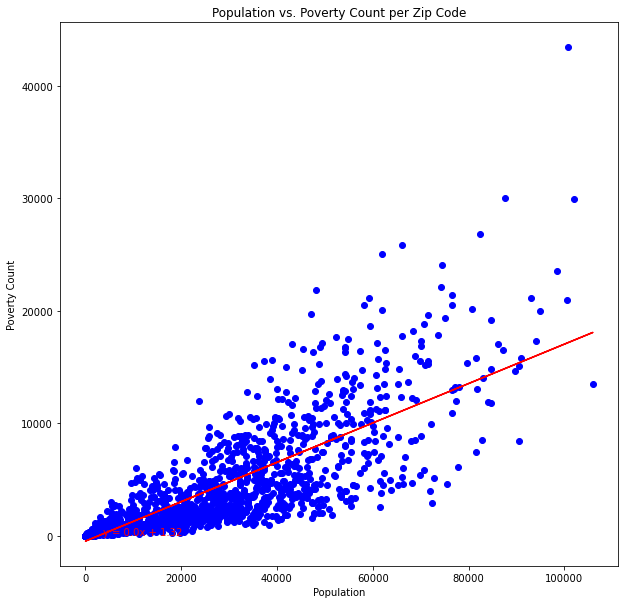

In [23]:
# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(counties_zips_datapdvendorsrates_df['Population'], counties_zips_datapdvendorsrates_df['Poverty Count'])
regression_values = counties_zips_datapdvendorsrates_df['Population'] * slope + intercept

# Make a variable for the line equation
line_eq8 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print the r-value
print(f'r-value or the correlation coefficient = {rvalue}');

# Plot the data and linear regression
fig8, ax8 = plt.subplots(figsize=(10, 10));
ax8.scatter(counties_zips_datapdvendorsrates_df['Population'],counties_zips_datapdvendorsrates_df['Poverty Count'], marker='o', color='b');
ax8.plot(counties_zips_datapdvendorsrates_df['Population'], regression_values, "r-");
ax8.set(xlabel='Population', ylabel='Poverty Count', title='Population vs. Poverty Count per Zip Code');
ax8.annotate(line_eq6, xy=(20000, 12), xycoords='data',xytext=(0.8, 0.95), textcoords='offset points', horizontalalignment='right', color="red");
plt.savefig("images/PopvsPC.png")